In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def read_timing_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()

    data = {}
    current_key = None
    for line in lines:
        line = line.strip()
        if not line:
            continue
        if any(c.isalpha() for c in line):  # it's a version label like "v0"
            current_key = line
            data[current_key] = []
        else:
            try:
                data[current_key].append(float(line))
            except:
                pass
    return data

In [3]:
filepath = "../timings/timings/Global_timings.txt" 
data = read_timing_file(filepath)


total_times = {k: v for k, v in data.items() if 'enkel' not in k.lower()}
kernel_times = {k: v for k, v in data.items() if 'enkel' in k.lower()}


In [4]:


def plot_boxplots(data_dict, title, color, ax):
    labels = list(data_dict.keys())
    data_values = [data_dict[k] for k in labels]
    means = [np.mean(values) for values in data_values]

    ax.boxplot(data_values, labels=labels, patch_artist=True,
               boxprops=dict(facecolor=color), medianprops=dict(color='red'))
    ax.set_title(title, fontsize=16)
    ax.tick_params(axis='x', rotation=15)
    ax.grid(True, axis='y')

    for i, mean in enumerate(means, 1):
        ax.text(i, mean + 90, f'{mean:.2f} ms', ha='center', fontsize=10, color='black')


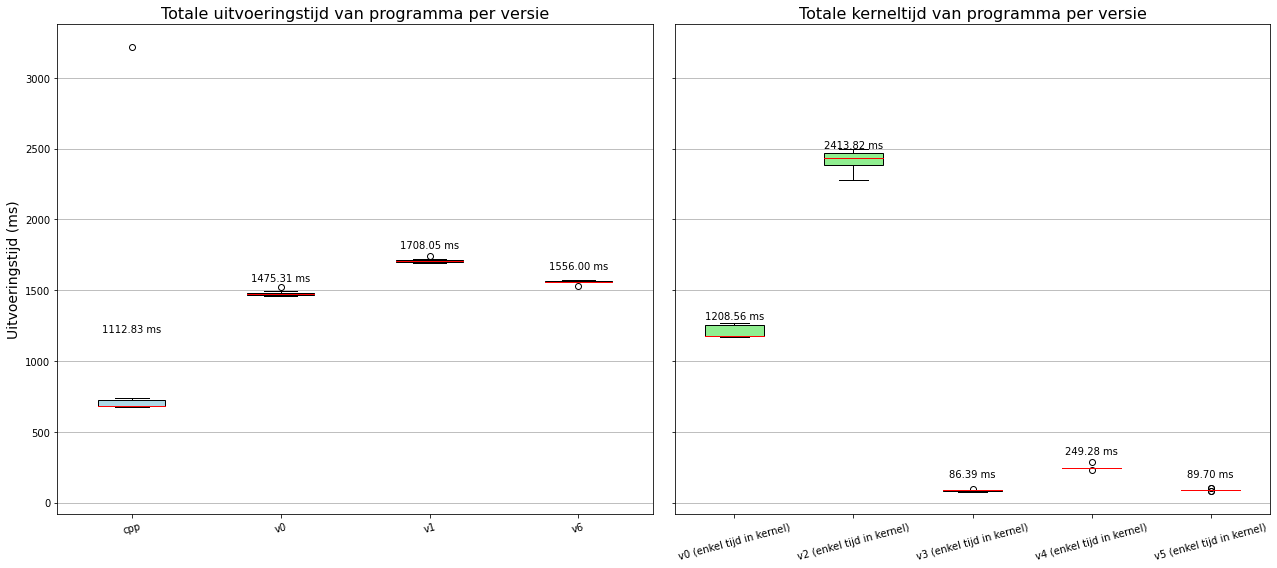

In [5]:

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

plot_boxplots(total_times, "Totale uitvoeringstijd van programma per versie", 'lightblue', axes[0])
axes[0].set_ylabel("Uitvoeringstijd (ms)", fontsize=14)

plot_boxplots(kernel_times, "Totale kerneltijd van programma per versie", 'lightgreen', axes[1])

plt.tight_layout()
plt.show()


Voor frames:

In [7]:
filepath = "../timings/timings/Global_avg_frame_timings.txt" 
data = read_timing_file(filepath)


total_times = {k: v for k, v in data.items() if 'enkel' not in k.lower()}
kernel_times = {k: v for k, v in data.items() if 'enkel' in k.lower()}

In [8]:
def plot_boxplots_larger(data_dict, title, color, ax):
    labels = list(data_dict.keys())
    data_values = [data_dict[k] for k in labels]
    means = [np.mean(values) for values in data_values]

    ax.boxplot(data_values, labels=labels, patch_artist=True,
           boxprops=dict(facecolor=color), medianprops=dict(color='red'))

    ax.set_title(title, fontsize=24)
    ax.set_xlabel("Versie", fontsize=19)
    ax.set_ylabel("Tijd (ms)", fontsize=19)
    ax.tick_params(axis='x', rotation=45, labelsize=19)
    ax.tick_params(axis='y', labelsize=19)
    ax.grid(True, axis='y')

    for i, mean in enumerate(means, 1):
        ax.text(i, mean + 0.5, f'{mean:.2f} ms', ha='center', fontsize=19, color='black')


def plot_boxplots_smaller(data_dict, title, color, ax):
    labels = list(data_dict.keys())
    data_values = [data_dict[k] for k in labels]
    means = [np.mean(values) for values in data_values]

    ax.boxplot(data_values, labels=labels, patch_artist=True,
           boxprops=dict(facecolor=color), medianprops=dict(color='red'))

    ax.set_title(title, fontsize=24)
    ax.set_xlabel("Versie", fontsize=19)
    ax.set_ylabel("Tijd (ms)", fontsize=19)
    ax.tick_params(axis='x', rotation=19, labelsize=19)
    ax.tick_params(axis='y', labelsize=19)
    ax.grid(True, axis='y')

    for i, mean in enumerate(means, 1):
        ax.text(i, mean + 0.2, f'{mean:.2f} ms', ha='center', fontsize=19, color='black')


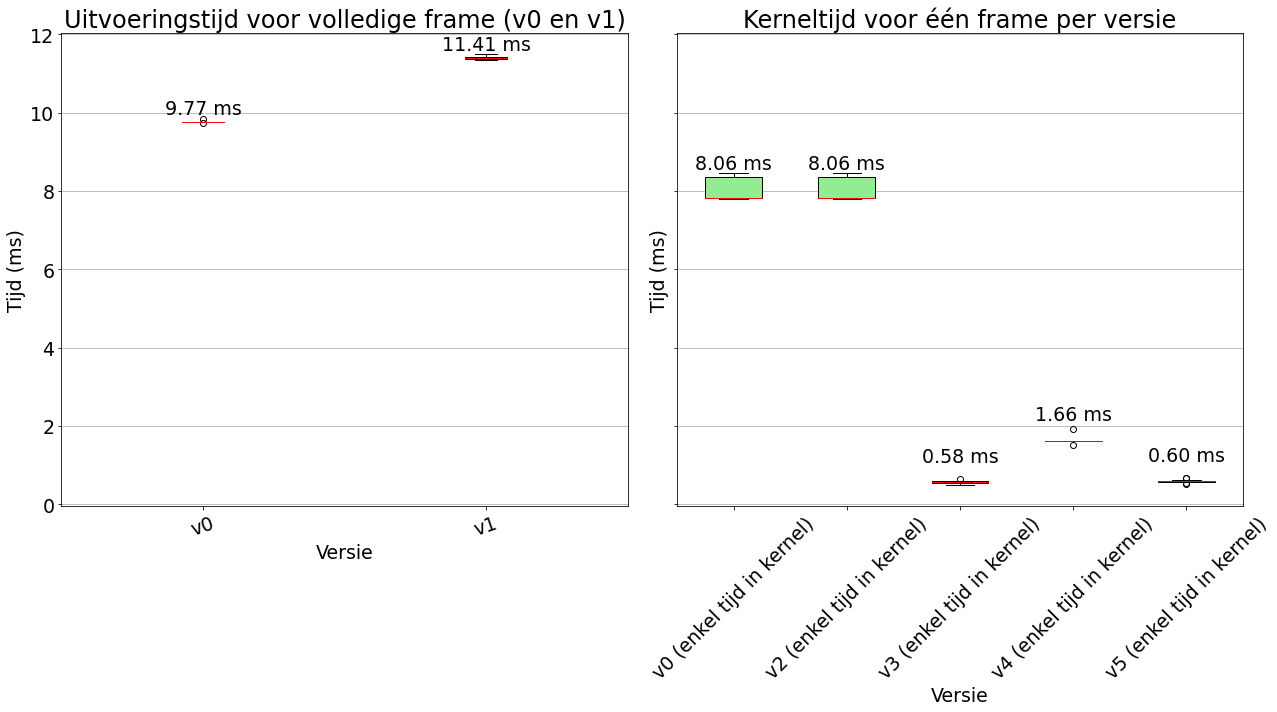

In [9]:

fig, axes = plt.subplots(1, 2, figsize=(18, 10), sharey=True)

plot_boxplots_smaller(total_times, "Uitvoeringstijd voor volledige frame (v0 en v1)", 'lightblue', axes[0])
axes[0].set_ylabel("Tijd (ms)", fontsize=19)

plot_boxplots_larger(kernel_times, "Kerneltijd voor één frame per versie", 'lightgreen', axes[1])

plt.tight_layout()
plt.show()